In [131]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

In [86]:
# reading the dataset
dataset = pd.read_csv("titanic.csv")
dataset.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                     

In [87]:
# extracting the column names from dataset
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [88]:
# datatypes of columns
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [89]:
# number of missing values in each column
dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [90]:
# converting daataset into a dataframe
df= pd.DataFrame(dataset)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [91]:
# to filter columns with missing value
missing_values = [col for col in df.columns if df[col].isnull().sum()]
missing_values

['Age', 'Cabin', 'Embarked']

In [92]:
def numerical_summary(df):
    total = df.shape[0]
    missing_column = [col for col in df.columns if df[col].isnull().sum() > 0 ]
    missing_percent = {}
    for col in missing_column:
        null_count = df[col].isnull().sum()
        percent = (null_count/total)*100
        missing_percent[col]= percent
        print("{} : {} ({}%)".format(col, null_count, round(percent, 3)))
    return missing_percent

In [93]:
missing_percent = numerical_summary(df)
missing_percent

Age : 177 (19.865%)
Cabin : 687 (77.104%)
Embarked : 2 (0.224%)


{'Age': 19.865319865319865,
 'Cabin': 77.10437710437711,
 'Embarked': 0.22446689113355783}

In [94]:
# we will drop the name and ticket column as it doesnt contribute to survival
df.drop(columns=["Name"],inplace= True)
df.drop(columns=["Ticket"],inplace = True)

In [95]:
# as the cabin missing value is too high we will drop the cabin column and also drop fare column as it provide no contribution to the survival rate
df.drop(columns=['Fare'],inplace = True)
df.drop(columns=['Cabin'],inplace = True)

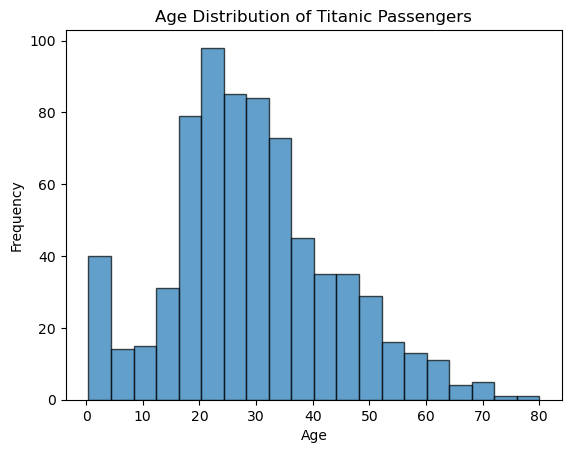

In [99]:
plt.hist(df['Age'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution of Titanic Passengers")
plt.show()

In [100]:
# from the visualization of age ,it is clear it is right skewed so we can treat the missing values in the column with median imputation
df['Age'].fillna(df['Age'].median(),inplace = True)

In [105]:
#we will treat the two missing values in embarked column with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)



In [106]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Embarked'],
      dtype='object')

In [107]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Embarked     891 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 55.8+ KB


In [109]:
""" after the treatment of missing values,moving on to next step of data preprocessing which is encoding,for that we will find out
the  categorical va;lues in the dataset"""
categorical_val = df.select_dtypes(include = ['object']).columns
categorical_val

Index(['Sex', 'Embarked'], dtype='object')

In [110]:
#now applying one hot encoding to categorical columns
df=pd.get_dummies(df,columns=['Sex','Embarked'])

In [111]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [112]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,False,True,False,False,True
1,2,1,1,38.0,1,0,True,False,True,False,False
2,3,1,3,26.0,0,0,True,False,False,False,True
3,4,1,1,35.0,1,0,True,False,False,False,True
4,5,0,3,35.0,0,0,False,True,False,False,True


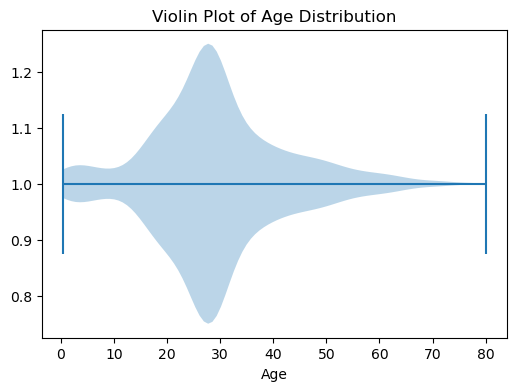

In [115]:
# Violin plot for age distribution
c
plt.violinplot(df['Age'], vert=False)
plt.xlabel("Age")
plt.title("Violin Plot of Age Distribution")
plt.show()

Text(0.5, 1.0, 'Passenger Class Distribution')

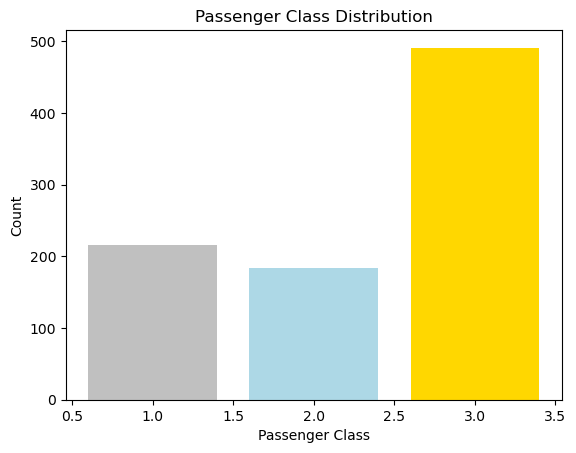

In [117]:
# Barchart to visualize different number of passengers in passenger class
plt.bar(df['Pclass'].value_counts().index, df['Pclass'].value_counts().values, color=['gold', 'silver', 'lightblue'])
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.title("Passenger Class Distribution")

Text(0.5, 1.0, 'Gender Distribution')

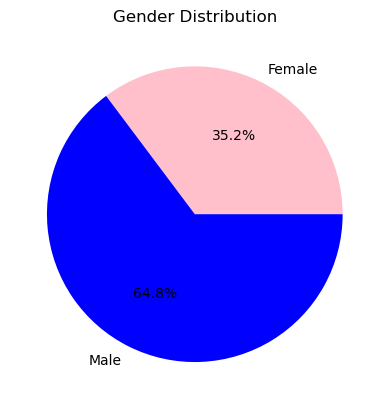

In [125]:
#Pie Chart of Gender Distribution
gender_counts=df[["Sex_female","Sex_male"]].sum()
plt.pie(gender_counts, labels=['Female', 'Male'], autopct='%1.1f%%', colors=['pink', 'blue'])
plt.title("Gender Distribution")

Text(0.5, 1.0, 'Age Distribution by Passenger Class')

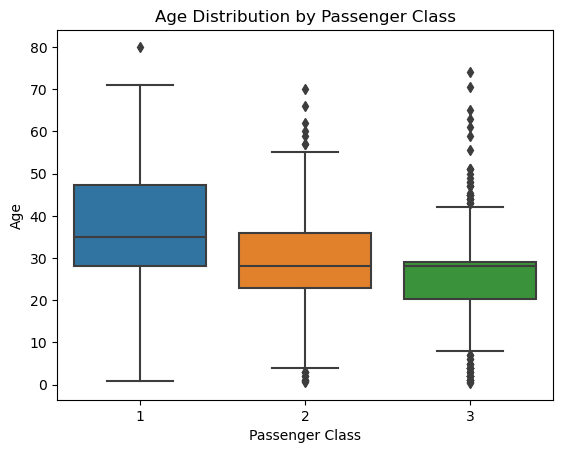

In [126]:
#Boxplot of Age by Passenger Class
sns.boxplot(x=df['Pclass'], y=df['Age'])
plt.xlabel("Passenger Class")
plt.ylabel("Age")
plt.title("Age Distribution by Passenger Class")

AttributeError: 'numpy.bool_' object has no attribute 'startswith'

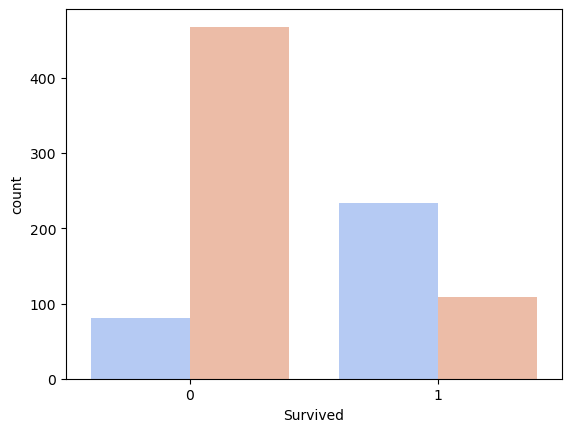

In [127]:
#Countplot of Survival by Gender
sns.countplot(x="Survived", hue="Sex_male", data=df, palette="coolwarm")
plt.xticks([0, 1], ["Not Survived", "Survived"])
plt.xlabel("Survival Status")
plt.ylabel("Count")
plt.title("Survival Count by Gender")

Text(0.5, 1.0, 'Feature Correlation Heatmap')

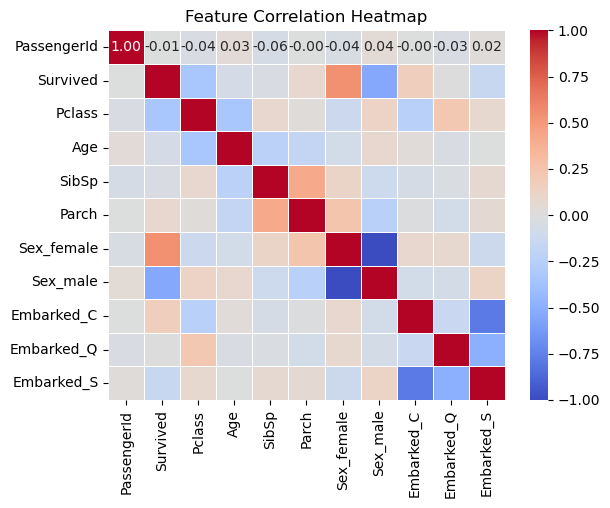

In [128]:
#Heatmap of Correlation Matrix of dataframe
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")

In [129]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [132]:
# Preparation for machine learning purposes
X=df.drop(columns=['Survived', 'PassengerId'])
Y=df["Survived"]

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)